Machine Learning Intern Assessment Assignment
Assignment Title : Customer Churn Prediction

Objective:
Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment

Tasks:
1. Data Preprocessing:
 Load the provided dataset and perform initial data exploration.
 Handle missing data and outliers.
 Prepare the data for machine learning by encoding categorical variables and splitting it into
training and testing sets.
2. Feature Engineering:
 Generate relevant features from the dataset that can help improve the model's prediction
accuracy.
 Apply feature scaling or normalization if necessary.
3. Model Building:
 Choose appropriate machine learning algorithms (e.g., logistic regression, random forest, or
neural networks).
 Train and validate the selected model on the training dataset.
 Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall,
F1-score).
4. Model Optimization:
 Fine-tune the model parameters to improve its predictive performance.
 Explore techniques like cross-validation and hyperparameter tuning.
5. Model Deployment:
 Once satisfied with the model's performance, deploy it into a production-like
environment (you can simulate this in a development environment).
 Ensure the model can take new customer data as input and provide churn predictions.

In [69]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [42]:
#import data
df=pd.read_excel(r'D:\VS code files\Customer Churn Prediction\customer_churn_large_dataset.xlsx')

In [61]:
#print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [46]:
#Print value count
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())
        print('_________________')

Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64
_________________
Female    50216
Male      49784
Name: Gender, dtype: int64
_________________
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64
_________________


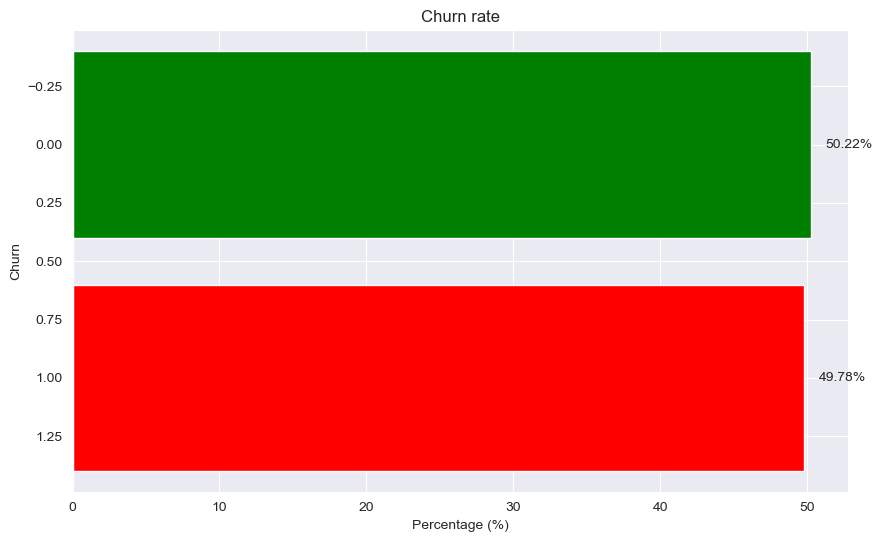

In [47]:
#Calculating churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(churn_rate.index, churn_rate.values, color=['green','red'])

plt.xlabel('Percentage (%)')
plt.ylabel('Churn')
plt.title('Churn rate')
plt.gca().invert_yaxis()  # Invert y-axis

# Add percentage labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}%', va='center')

plt.show()

In [48]:
df1=df.copy()
#Separating numerical and categorical columns
num=[]
cat=[]
for col in df1.columns:
    if pd.api.types.is_numeric_dtype(df1[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df1[col]):
        cat.append(col)

print('Numerical columns : ',num)
print('Categorical columns : ',cat)

Numerical columns :  ['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
Categorical columns :  ['Name', 'Gender', 'Location']


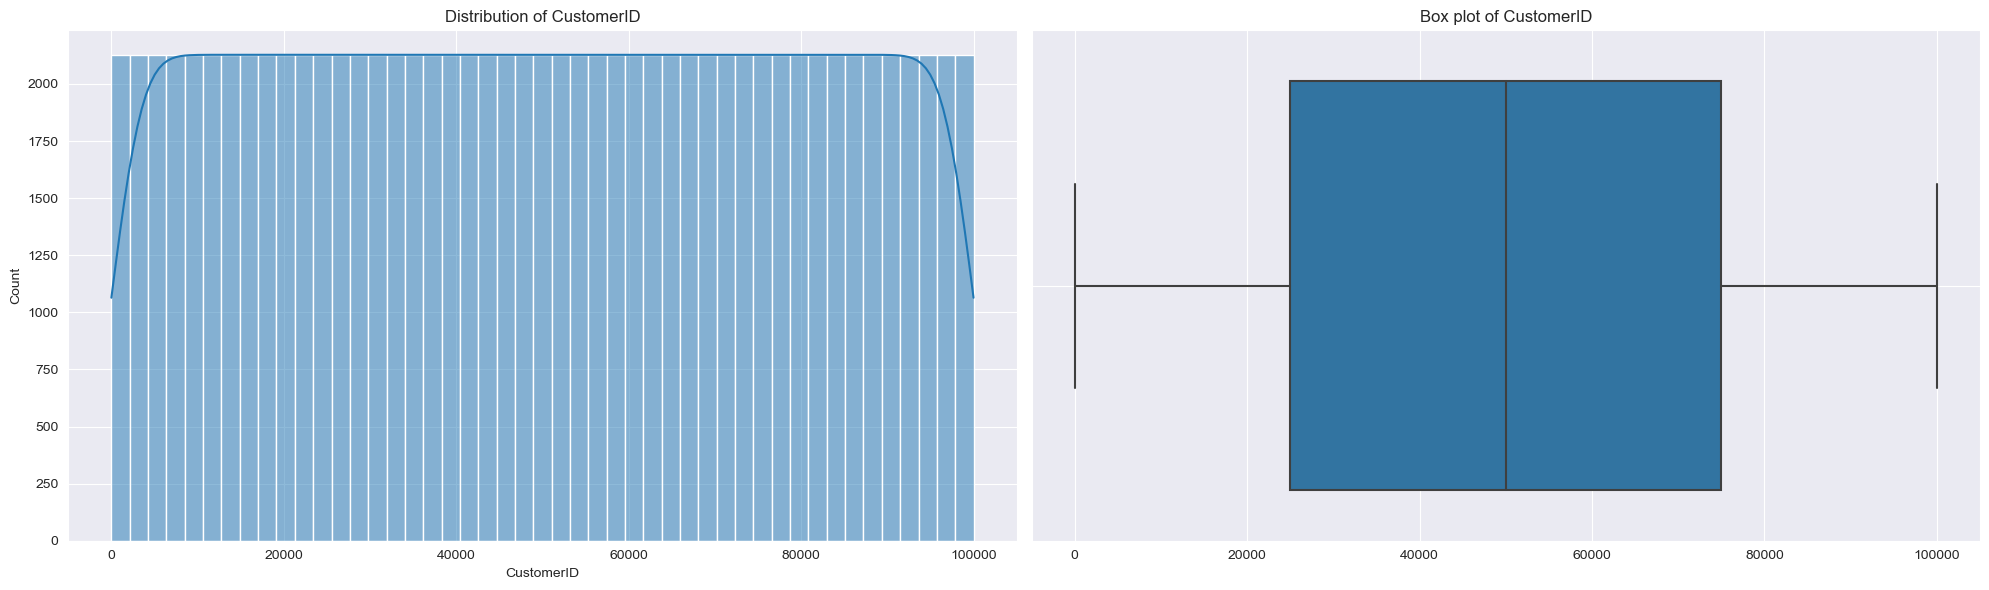

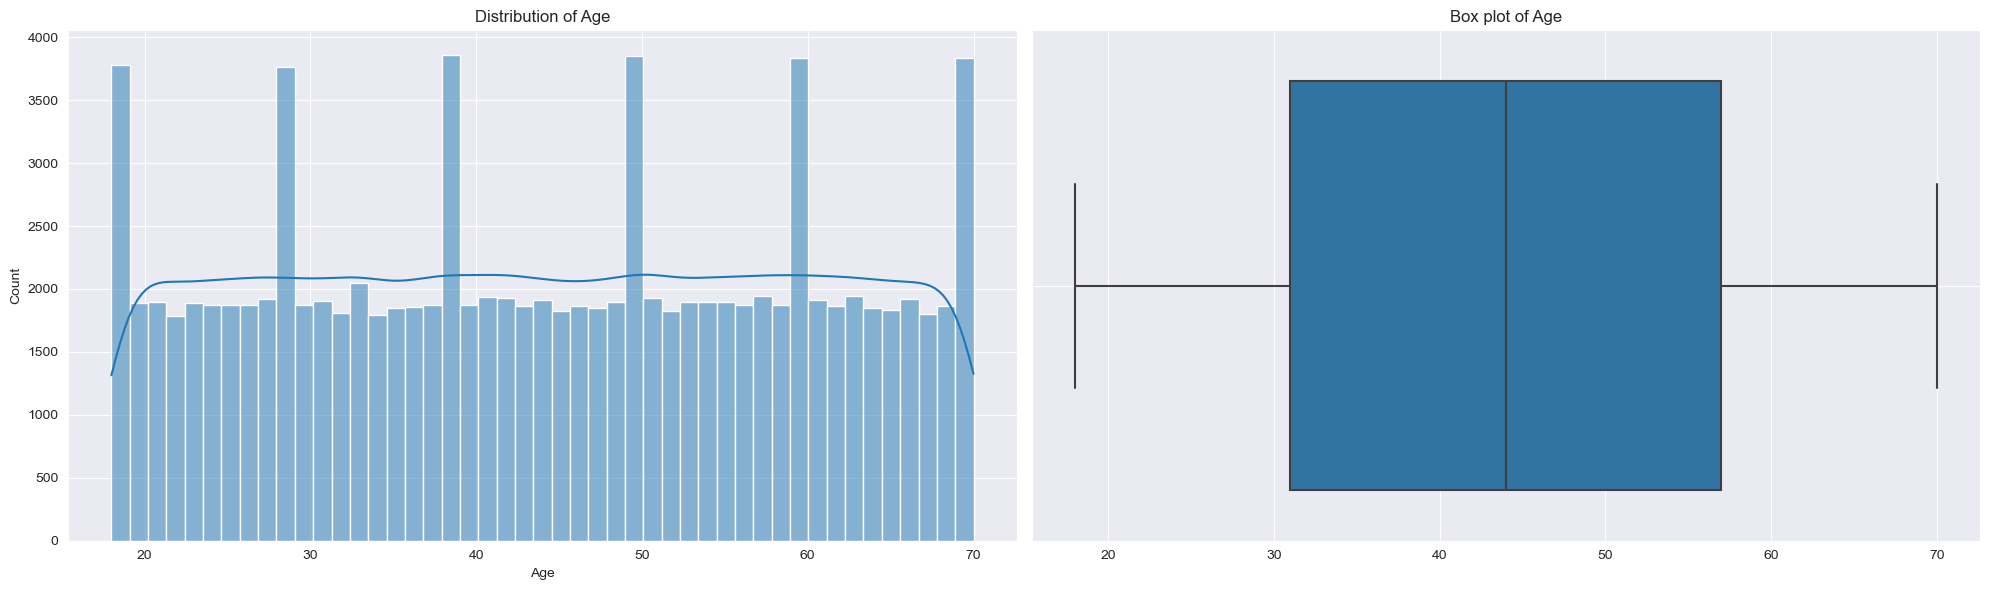

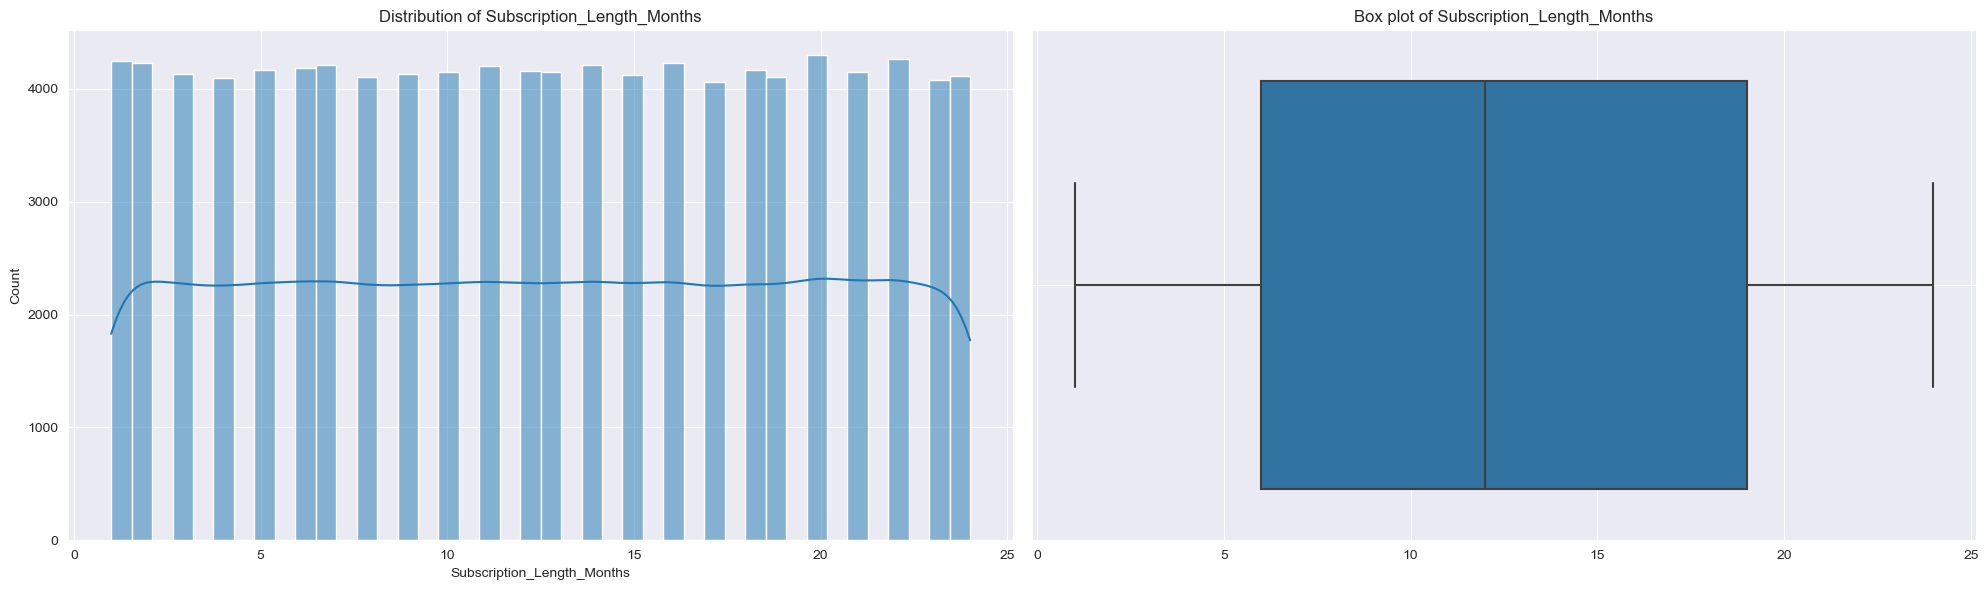

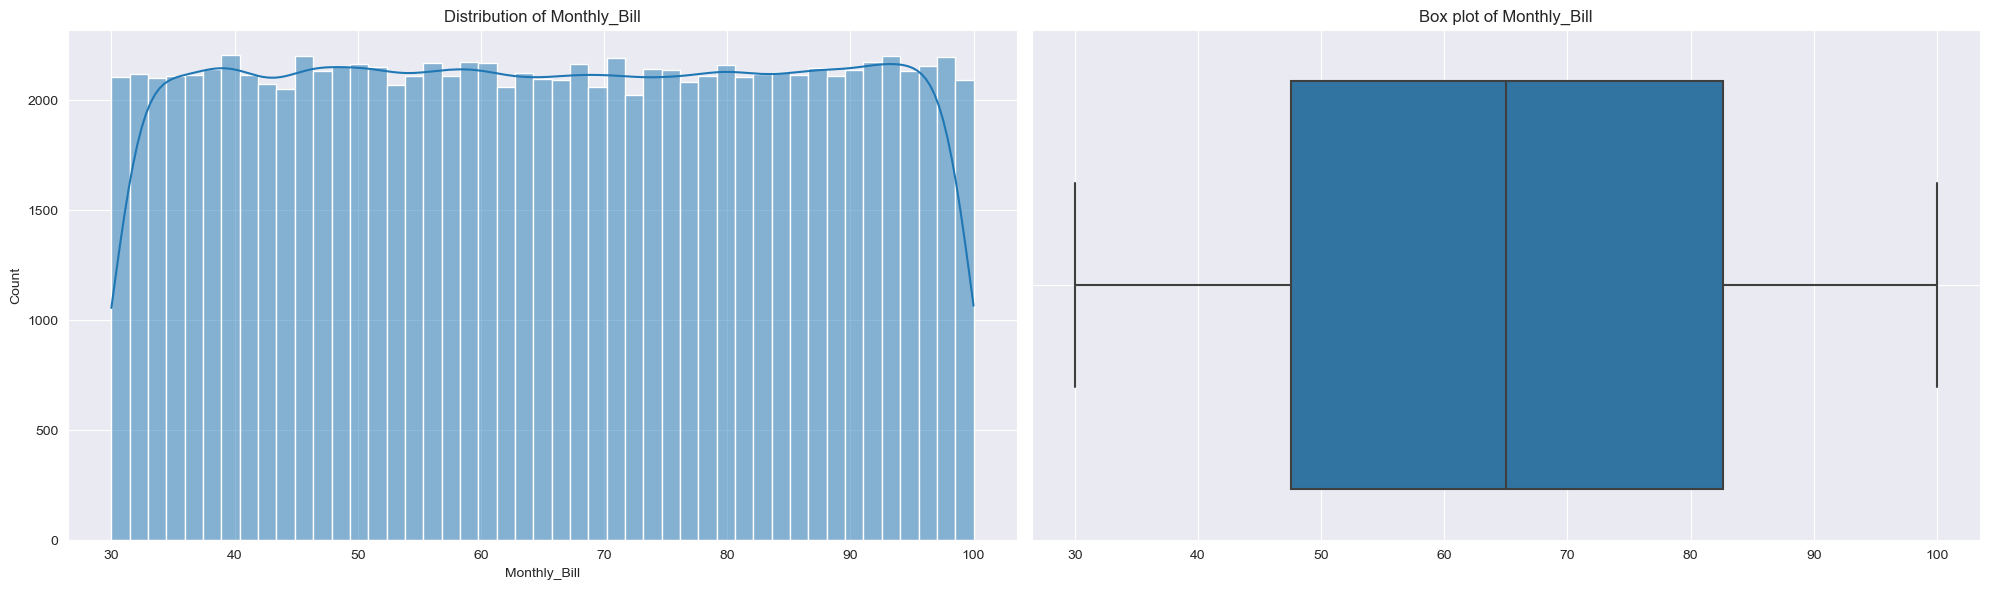

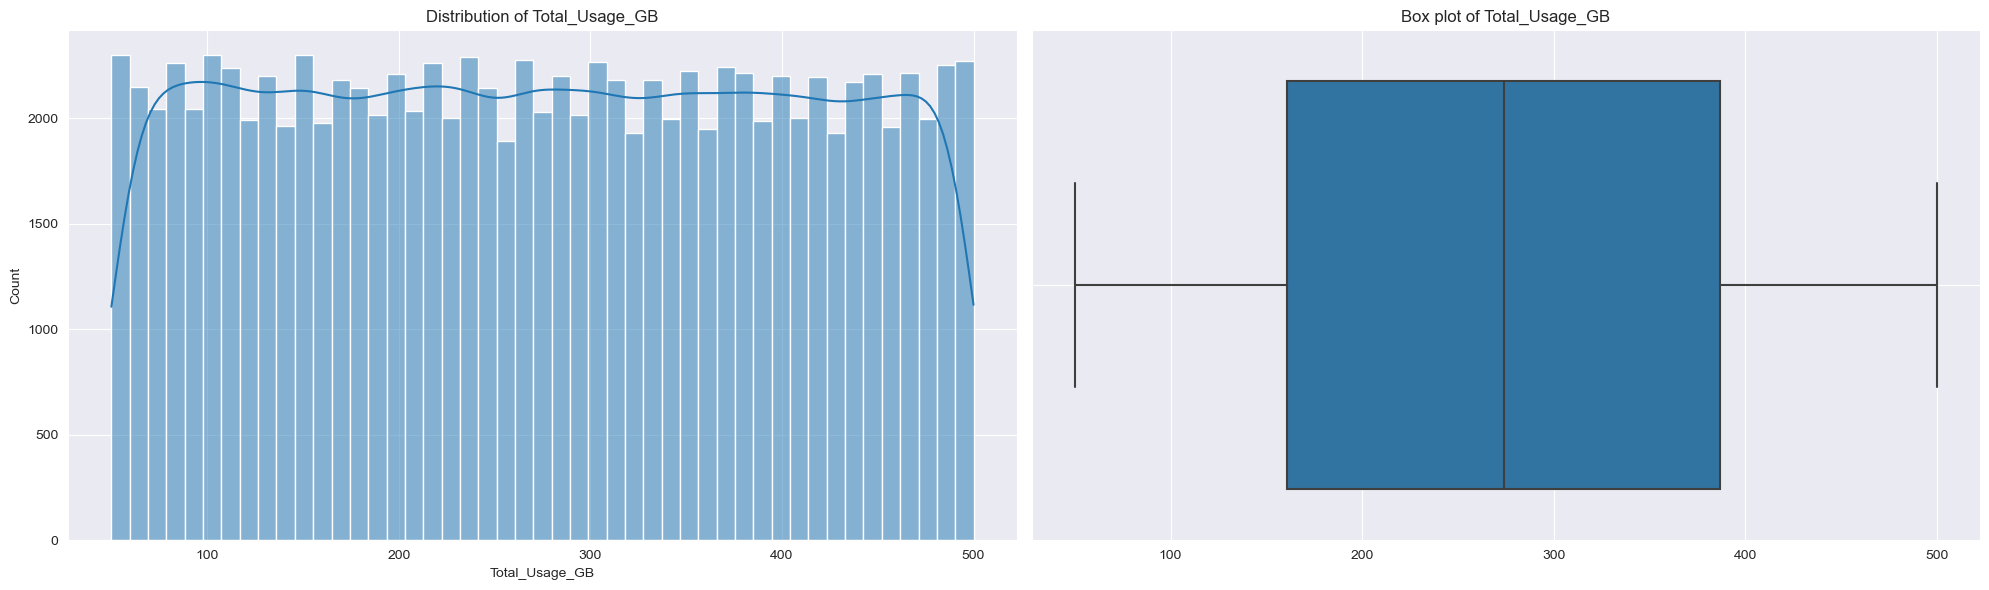

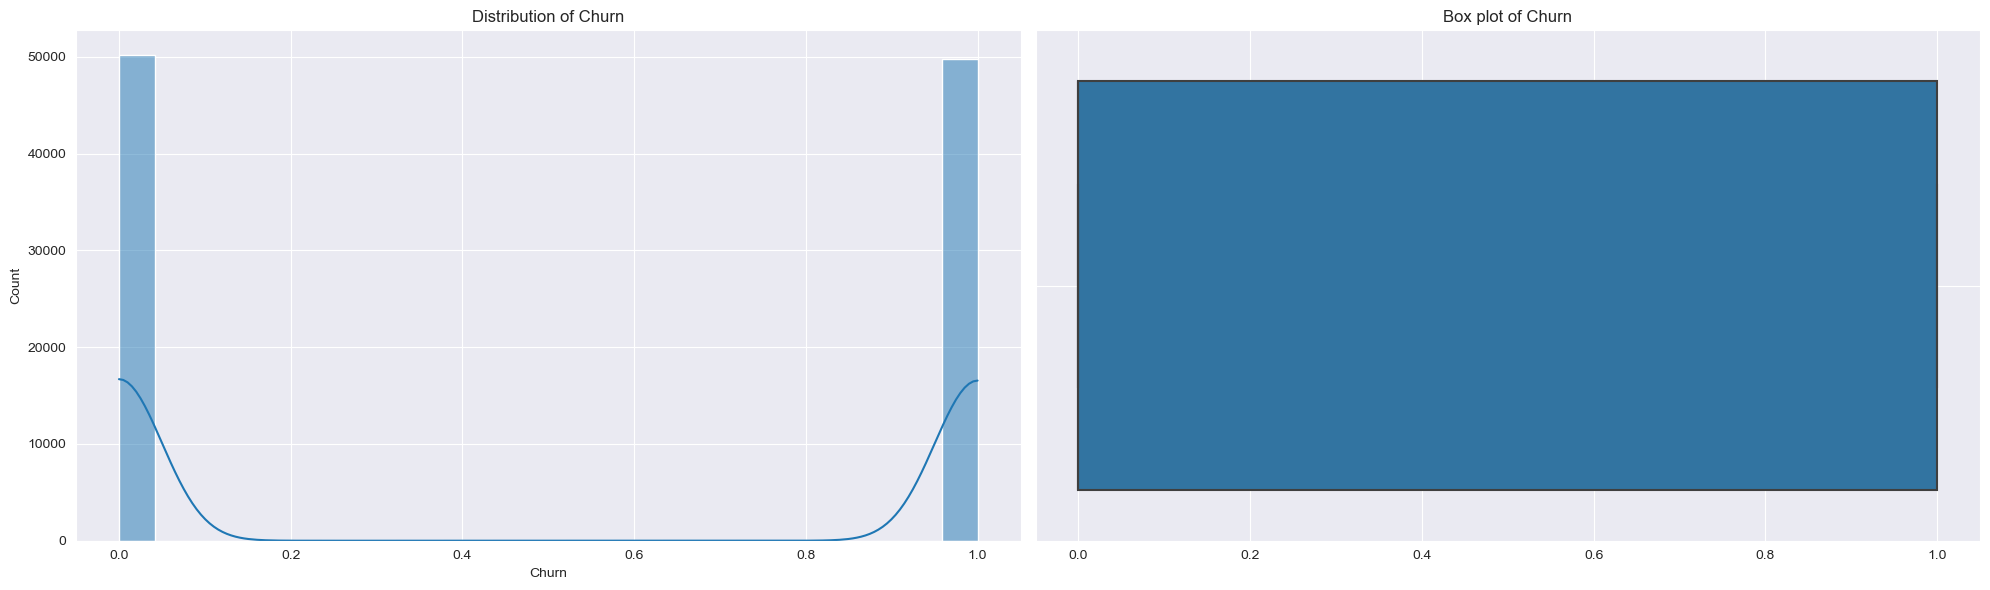

In [49]:
#Numerical column analysis
for i in num:
    fig,axes=plt.subplots(1,2,figsize=(20,6))

    sns.histplot(df1[i],kde=True,ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')

    sns.boxplot(x=df1[i],ax=axes[1])
    axes[1].set_title(f'Box plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    plt.tight_layout()
    plt.show()

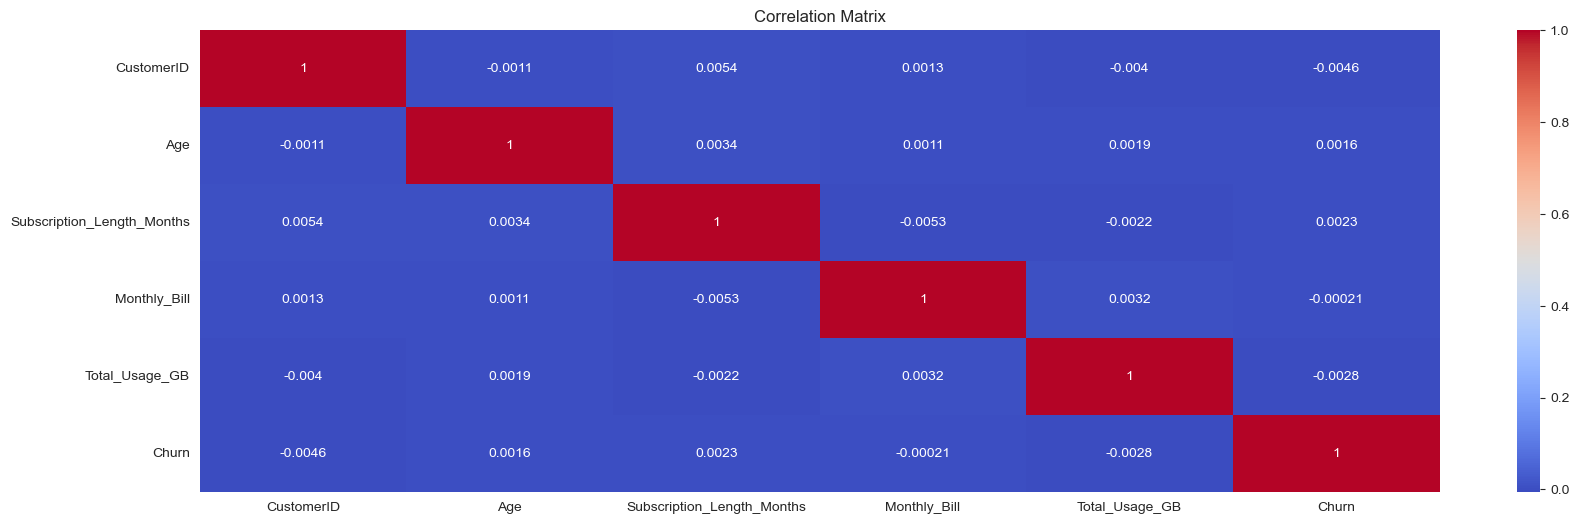

In [50]:
# Calculate the correlation matrix
numerical_columns = df.select_dtypes(include=['int64','float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(numerical_columns, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

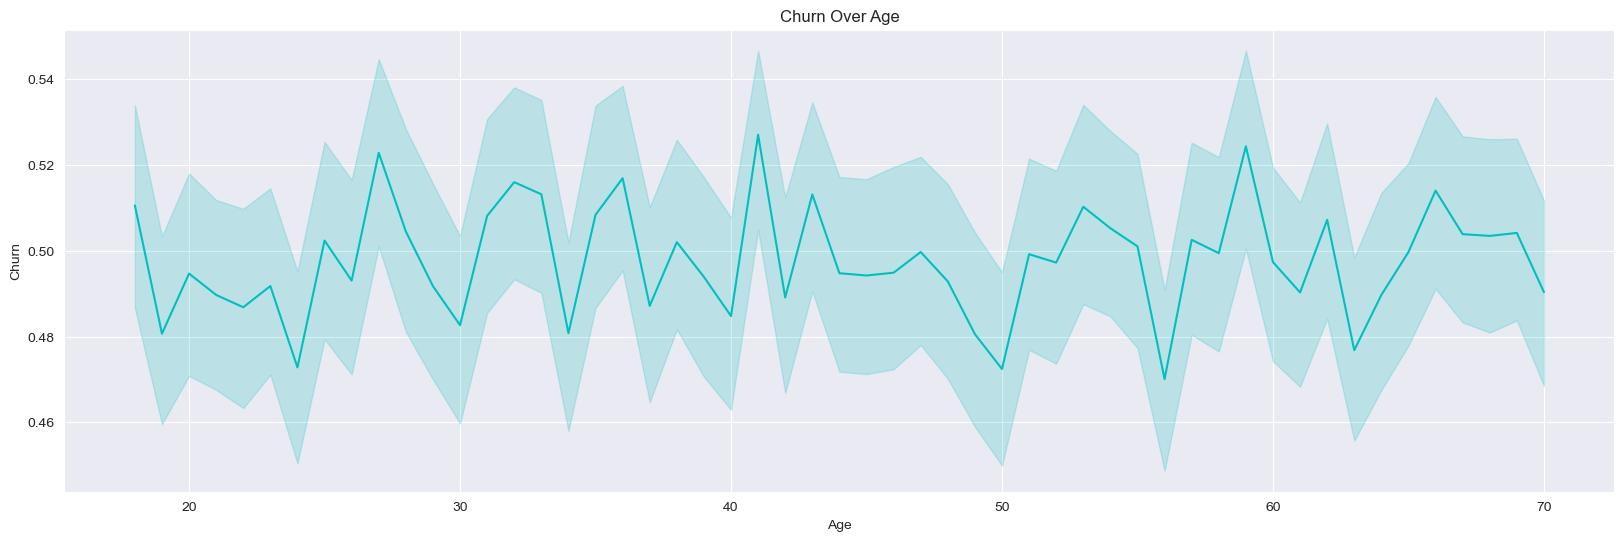

In [52]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Age', y='Churn', data=df,color='c')
plt.title("Churn Over Age")
plt.xlabel("Age")
plt.ylabel("Churn")
plt.show()

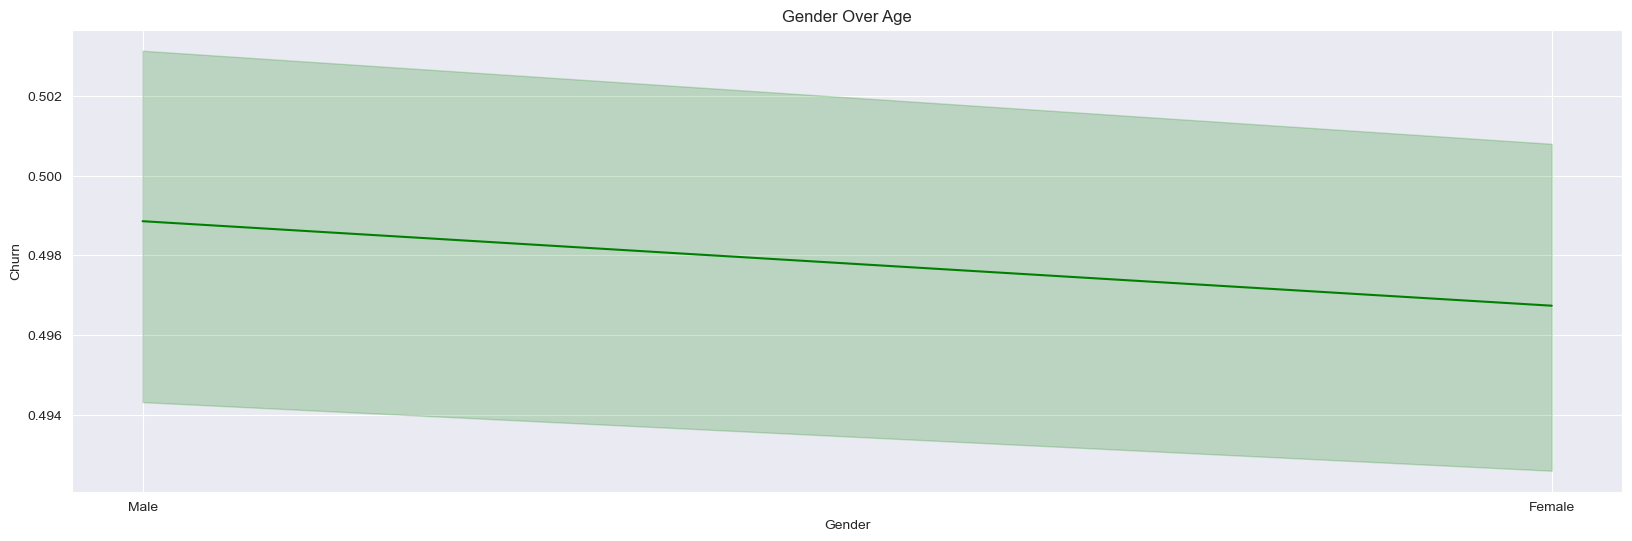

In [53]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Gender', y='Churn', data=df,color='g')
plt.title("Gender Over Age")
plt.xlabel("Gender")
plt.ylabel("Churn")
plt.show()

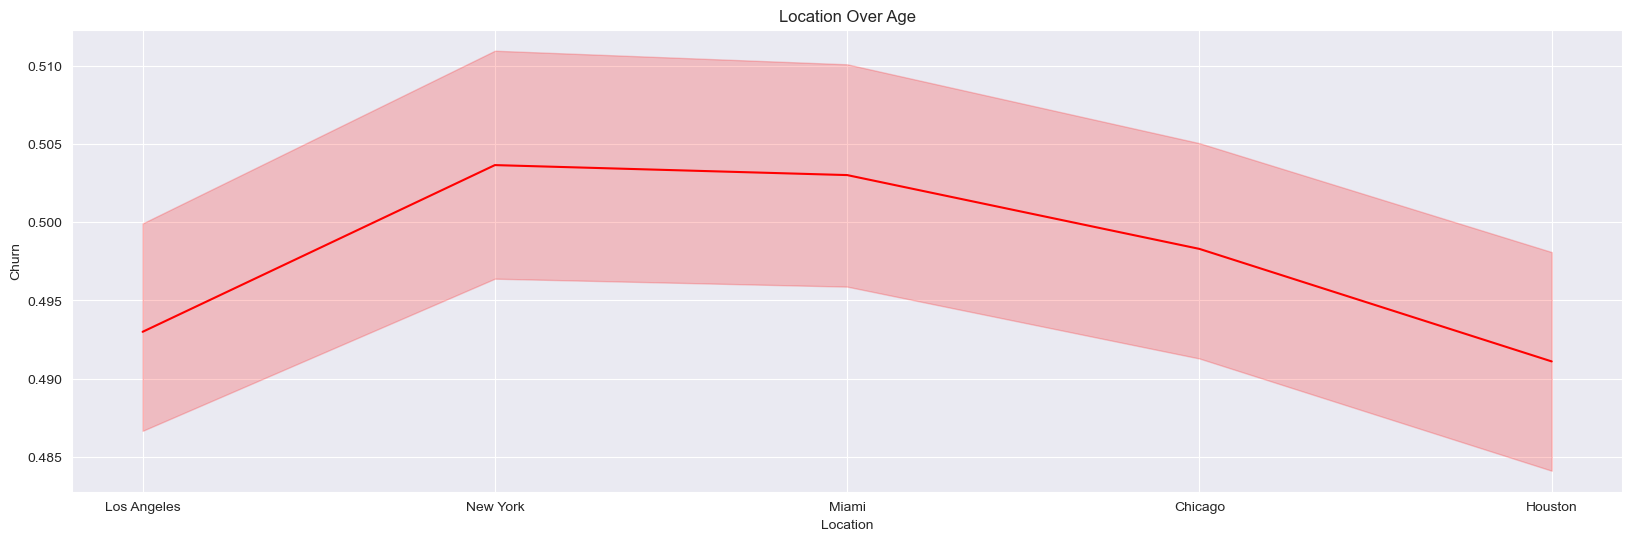

In [54]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Location', y='Churn', data=df,color='r')
plt.title("Location Over Age")
plt.xlabel("Location")
plt.ylabel("Churn")
plt.show()

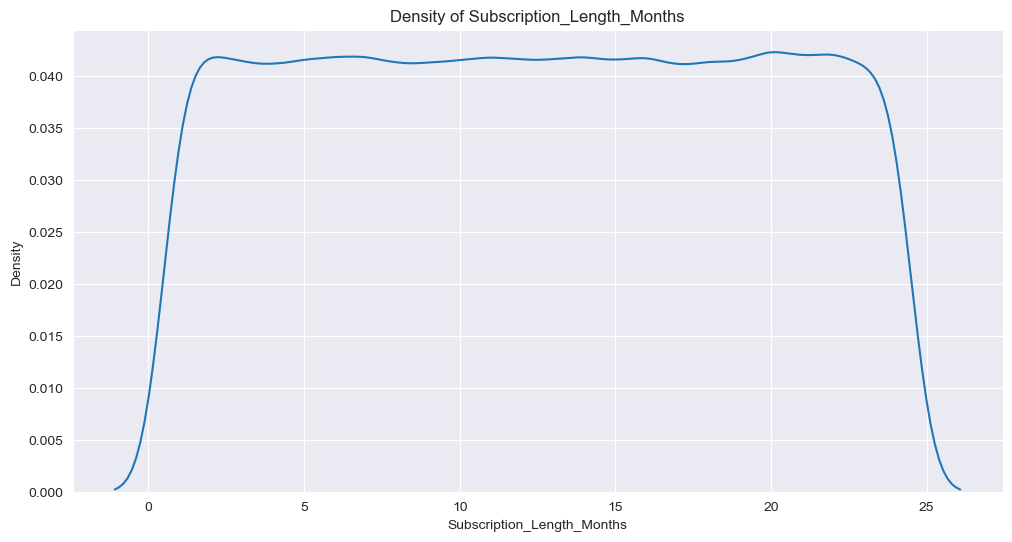

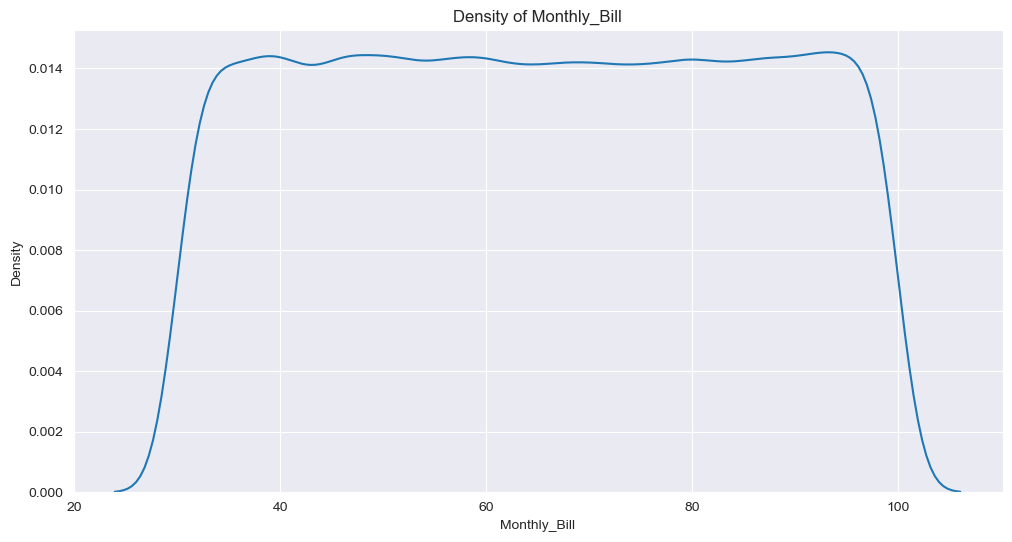

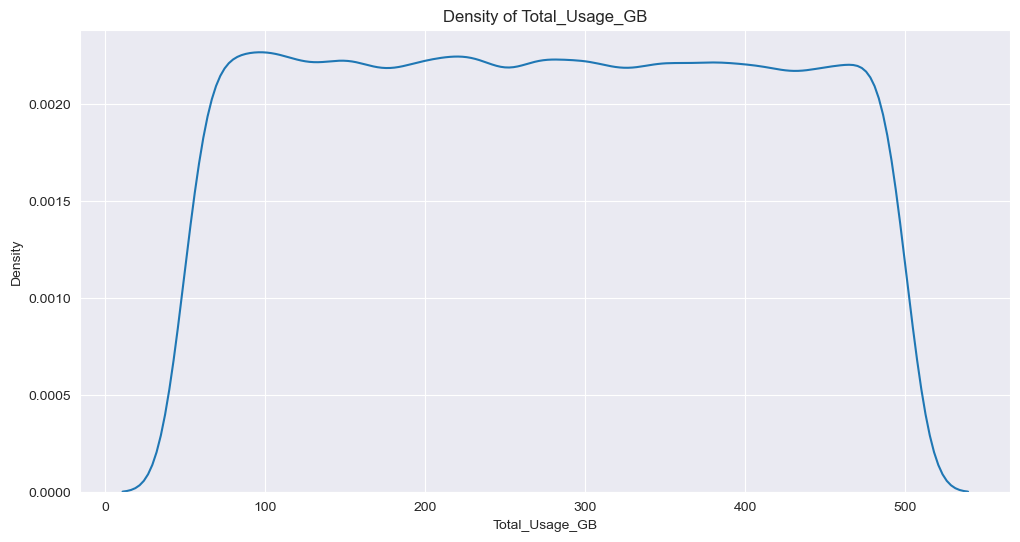

In [63]:
#Density of Subscription_Length_Months
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Subscription_Length_Months',data=df)
plt.title("Density of Subscription_Length_Months")
plt.xlabel("Subscription_Length_Months")
plt.ylabel("Density")
plt.show()

#Density of Monthly_Bill
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Monthly_Bill',data=df)
plt.title("Density of Monthly_Bill")
plt.xlabel("Monthly_Bill")
plt.ylabel("Density")
plt.show()

#Density of Total_Usage_GB
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Total_Usage_GB',data=df)
plt.title("Density of Total_Usage_GB")
plt.xlabel("Total_Usage_GB")
plt.ylabel("Density")
plt.show()

In [57]:
#Violin plot
#Gender & Age Group Distribution
plot = px.violin(x=df['Gender'],
                 y=df['Age'],
                 box=True,
                 points='all')
plot.update_traces(
    box_fillcolor='green',
    opacity=0.5
)
plot.update_layout(
    title='Gender & Age Group Distribution',
    xaxis_title='Gender',
    yaxis_title='Age Group'
)

plot.show()

In [59]:
#Splitting data
X=df.drop(columns=['Churn','CustomerID','Name'],axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
#numerical processing pipeline
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy='mean')),
           ("scaler",StandardScaler())]
)

#categorical processing
categorical_processor=Pipeline(
    steps=[("imputation_constant",SimpleImputer(fill_value='missing',strategy='constant')),
           ("onehot",OneHotEncoder(handle_unknown='ignore'))]
)

preprocessor=ColumnTransformer(
    [('categorical',categorical_processor,['Location','Gender']),
     ('numerical',numeric_processor,['Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Age'])]
)

pipe=make_pipeline(preprocessor,LogisticRegression(solver='saga',max_iter=300,n_jobs=-1))
pipe.fit(X_train,y_train)

#prediction
y_pred=pipe.predict(X_test)
score=accuracy_score(y_pred,y_test)

print("score",score)
print('F1 score:', f1_score(y_test, y_pred,average='weighted'))
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

score 0.5046666666666667
F1 score: 0.5013781487318237
Accuracy: 0.5046666666666667
Recall: 0.42254849137931033
Precision: 0.49952229299363055

 clasification report:
               precision    recall  f1-score   support

           0       0.51      0.59      0.54     15152
           1       0.50      0.42      0.46     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000


 confussion matrix:
 [[8866 6286]
 [8574 6274]]


You can pass new values for prediction ((note you have to pass 6 features values as X has 6 features as input))

In [76]:
# new_input = [["1","2","3","4","5","6"]]
# new_output = pipe.predict(new_input)
# print(new_input, new_output)

In [77]:
#New input result